# Biomedical Digital Image Processing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from collections import defaultdict
import cv2
from utils import *

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['font.size'] = 5

---
# 07. Morphology

### Base Image

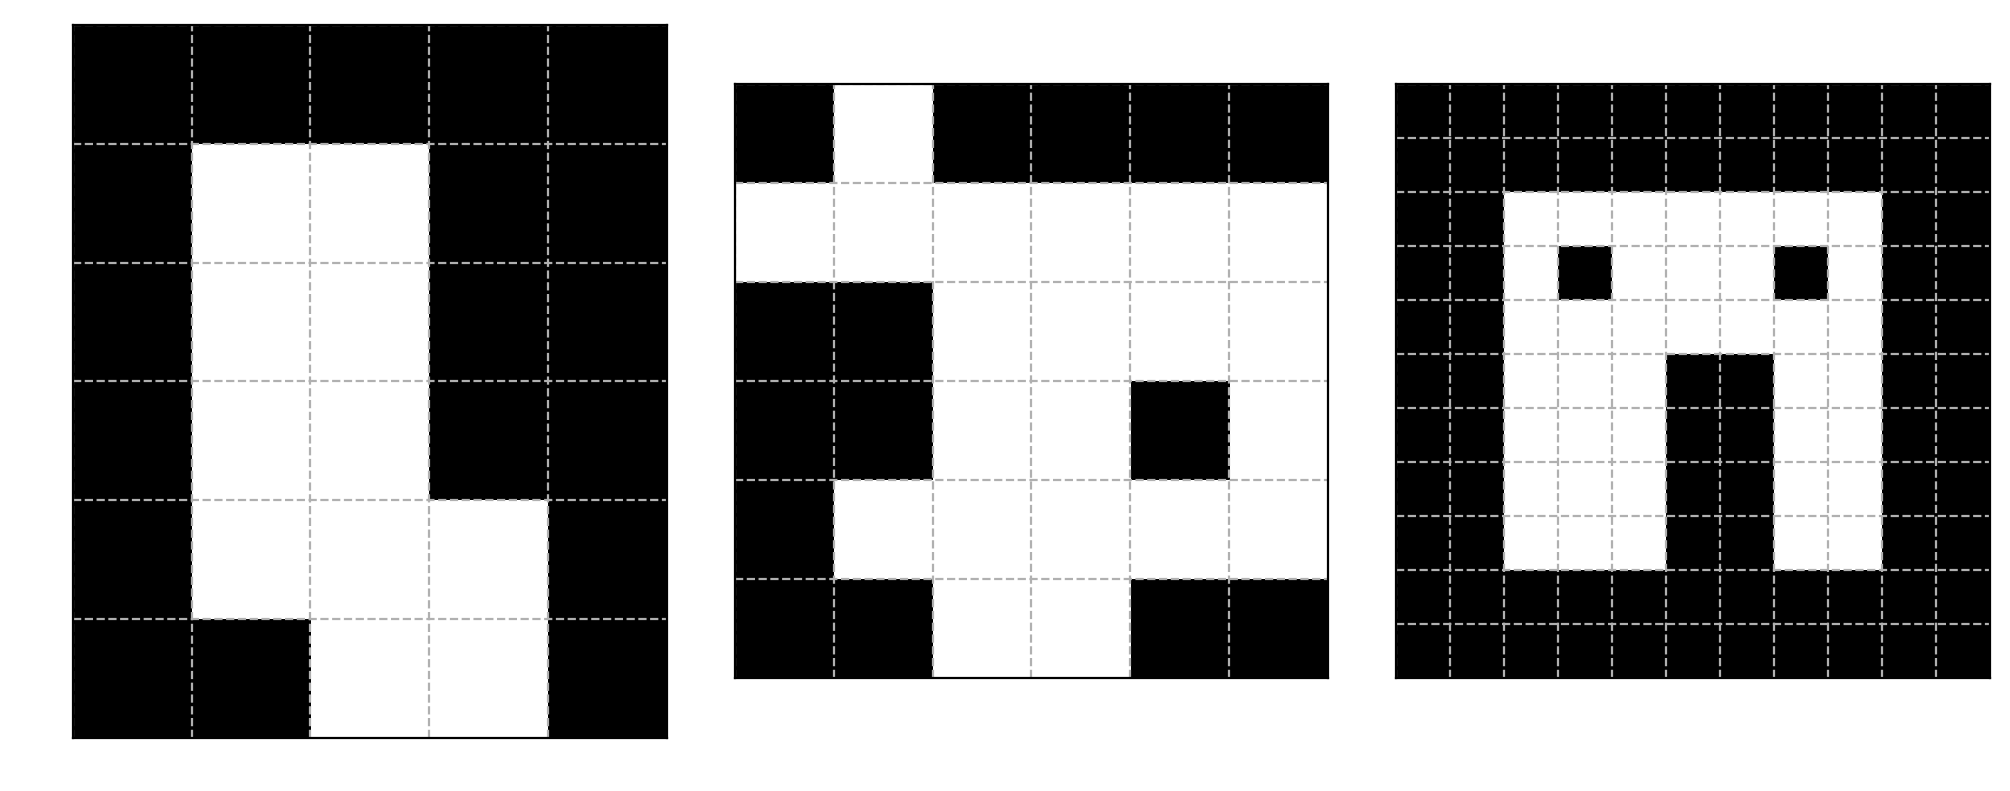

In [116]:
matrix1 = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 1, 0]
])

matrix2 = np.array([
    [0, 1, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1],
    [0, 0, 1, 1, 1, 1],
    [0, 0, 1, 1, 0, 1],
    [0, 1, 1, 1, 1, 1],
    [0, 0, 1, 1, 0, 0]
])

matrix3 = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
])

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(matrix1, cmap='gray')
plt.xticks([i-0.5 for i in range(matrix1.shape[1])])
plt.yticks([i-0.5 for i in range(matrix1.shape[0])])
plt.grid(linestyle='--')
plt.tick_params(axis='x', labelcolor='white', width=0)
plt.tick_params(axis='y', labelcolor='white', width=0)

plt.subplot(1, 3, 2)
plt.imshow(matrix2, cmap='gray')
plt.xticks([i-0.5 for i in range(matrix2.shape[1])])
plt.yticks([i-0.5 for i in range(matrix2.shape[0])])
plt.grid(linestyle='--')
plt.tick_params(axis='x', labelcolor='white', width=0)
plt.tick_params(axis='y', labelcolor='white', width=0)

plt.subplot(1, 3, 3)
plt.imshow(matrix3, cmap='gray')
plt.xticks([i-0.5 for i in range(matrix3.shape[1])])
plt.yticks([i-0.5 for i in range(matrix3.shape[0])])
plt.grid(linestyle='--')
plt.tick_params(axis='x', labelcolor='white', width=0)
plt.tick_params(axis='y', labelcolor='white', width=0)

plt.tight_layout()

### Dilation

$$ A\oplus B = \cup_{z\in B}A_z = \{(x,y)+(u,v)|(x,y)\in A, (u,v)\in B\}$$

In [117]:
def dilation(img, se):
    answer = img.copy()
    answer = np.pad(answer, 1)
    for h in range(1, img.shape[0]+1):
        for w in range(1, img.shape[1]+1):
            if img[h-1, w-1]:
                answer[h-1:h+2, w-1:w+2] += se
    return np.where(answer[1:-1, 1:-1]>0, 1, 0)

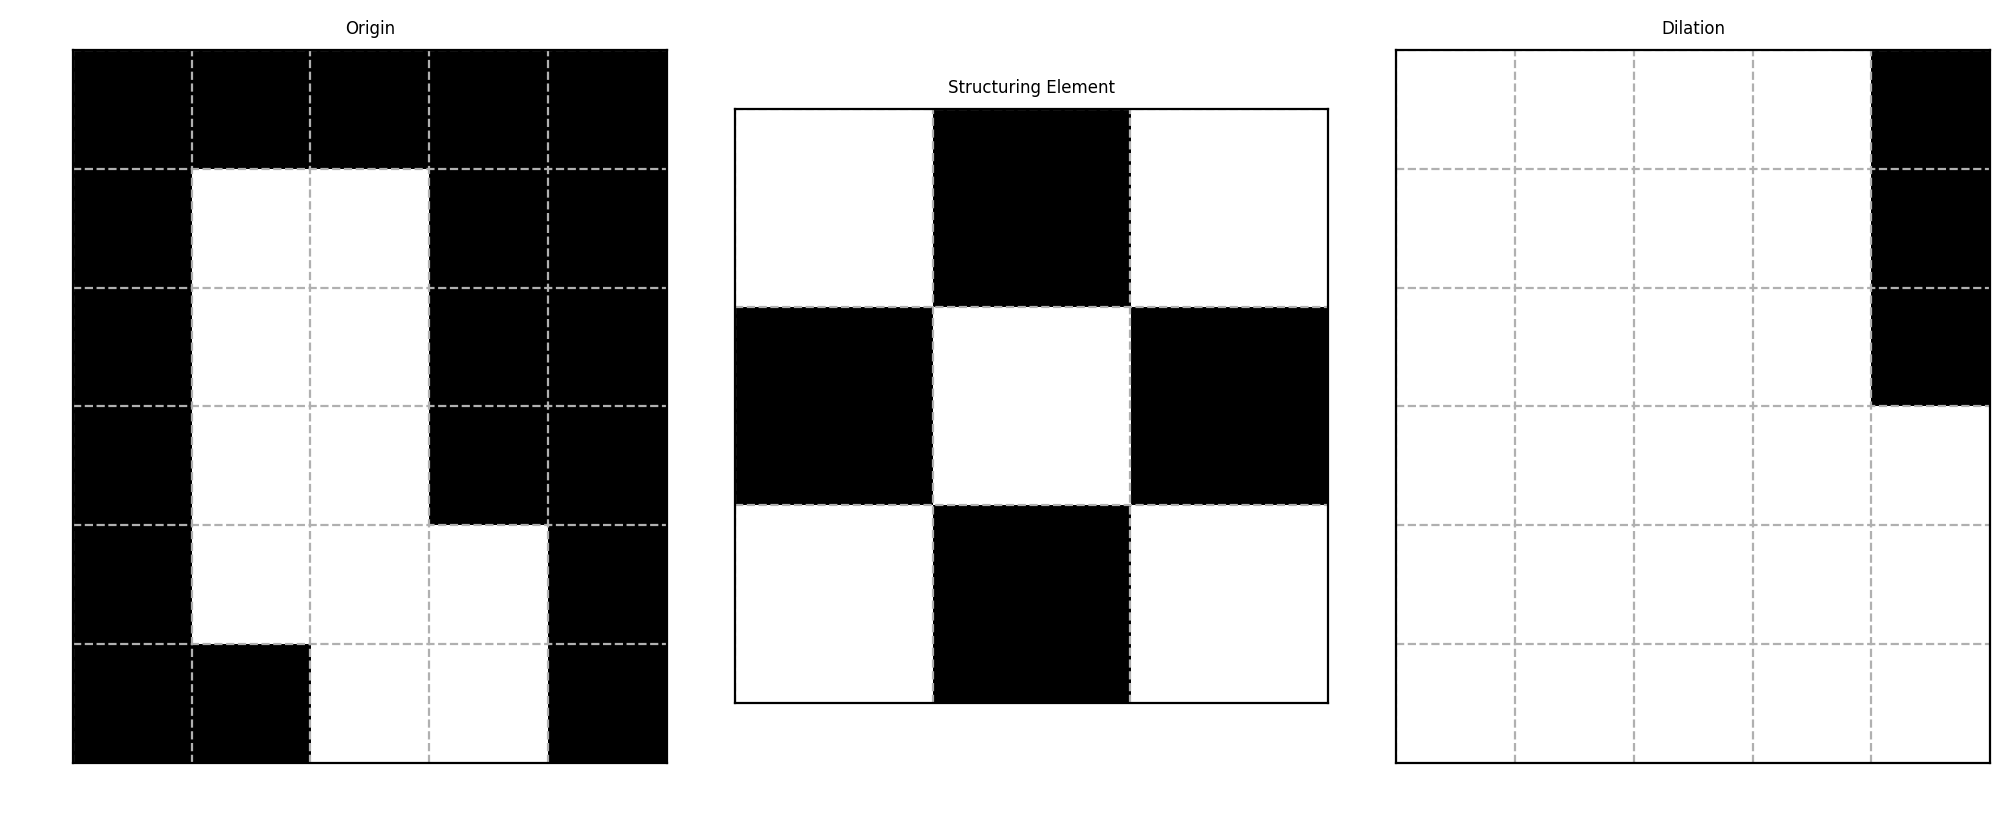

In [124]:
SE = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1]
])

matrix1_dilation = dilation(matrix1, SE)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(matrix1, cmap='gray')
plt.title('Origin')
plt.xticks([i-0.5 for i in range(matrix1.shape[1])])
plt.yticks([i-0.5 for i in range(matrix1.shape[0])])
plt.grid(linestyle='--')
plt.tick_params(axis='x', labelcolor='white', width=0)
plt.tick_params(axis='y', labelcolor='white', width=0)

plt.subplot(1, 3, 2)
plt.imshow(SE, cmap='gray')
plt.title('Structuring Element')
plt.xticks([i-0.5 for i in range(SE.shape[1])])
plt.yticks([i-0.5 for i in range(SE.shape[0])])
plt.grid(linestyle='--')
plt.tick_params(axis='x', labelcolor='white', width=0)
plt.tick_params(axis='y', labelcolor='white', width=0)

plt.subplot(1, 3, 3)
plt.imshow(matrix1_dilation, cmap='gray')
plt.title('Dilation')
plt.xticks([i-0.5 for i in range(matrix1_dilation.shape[1])])
plt.yticks([i-0.5 for i in range(matrix1_dilation.shape[0])])
plt.grid(linestyle='--')
plt.tick_params(axis='x', labelcolor='white', width=0)
plt.tick_params(axis='y', labelcolor='white', width=0)

plt.tight_layout()
plt.savefig('./img/07_dilation.png', dpi=150, bbox_inches='tight')

### Erosion

$$ A\ominus B = \{z|(B)_z\subseteq A, z\in A\} $$

In [5]:
def erosion(img, se):
    img_ref = img.copy()
    img_ref = np.pad(img_ref, 1)
    answer = np.zeros_like(img)
    answer = np.pad(answer, 1)
    for h in range(1, img.shape[0]+1):
        for w in range(1, img.shape[1]+1):
            if np.equal(np.where(se & img_ref[h-1:h+2, w-1:w+2]>0, 1, 0), se).all():
                answer[h, w] = 1
    return answer[1:-1, 1:-1]

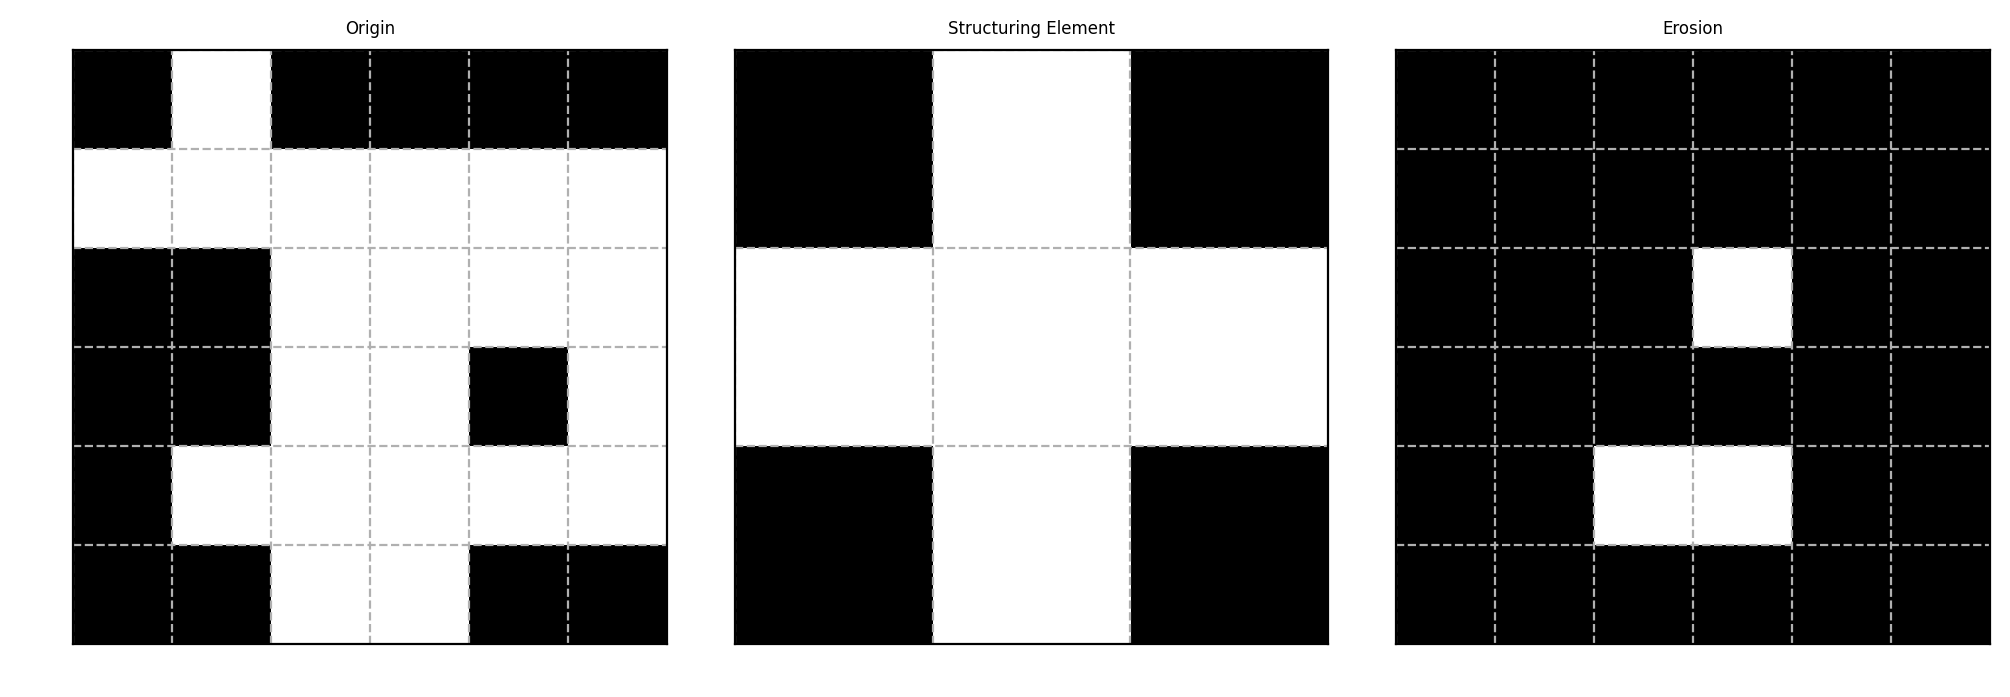

In [125]:
SE = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
])

matrix2_erosion = erosion(matrix2, SE)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(matrix2, cmap='gray')
plt.title('Origin')
plt.xticks([i-0.5 for i in range(matrix2.shape[1])])
plt.yticks([i-0.5 for i in range(matrix2.shape[0])])
plt.grid(linestyle='--')
plt.tick_params(axis='x', labelcolor='white', width=0)
plt.tick_params(axis='y', labelcolor='white', width=0)

plt.subplot(1, 3, 2)
plt.imshow(SE, cmap='gray')
plt.title('Structuring Element')
plt.xticks([i-0.5 for i in range(SE.shape[1])])
plt.yticks([i-0.5 for i in range(SE.shape[0])])
plt.grid(linestyle='--')
plt.tick_params(axis='x', labelcolor='white', width=0)
plt.tick_params(axis='y', labelcolor='white', width=0)

plt.subplot(1, 3, 3)
plt.imshow(matrix2_erosion, cmap='gray')
plt.title('Erosion')
plt.xticks([i-0.5 for i in range(matrix2_erosion.shape[1])])
plt.yticks([i-0.5 for i in range(matrix2_erosion.shape[0])])
plt.grid(linestyle='--')
plt.tick_params(axis='x', labelcolor='white', width=0)
plt.tick_params(axis='y', labelcolor='white', width=0)

plt.tight_layout()
plt.savefig('./img/07_erosion.png', dpi=150, bbox_inches='tight')

### Dilation & Erosion

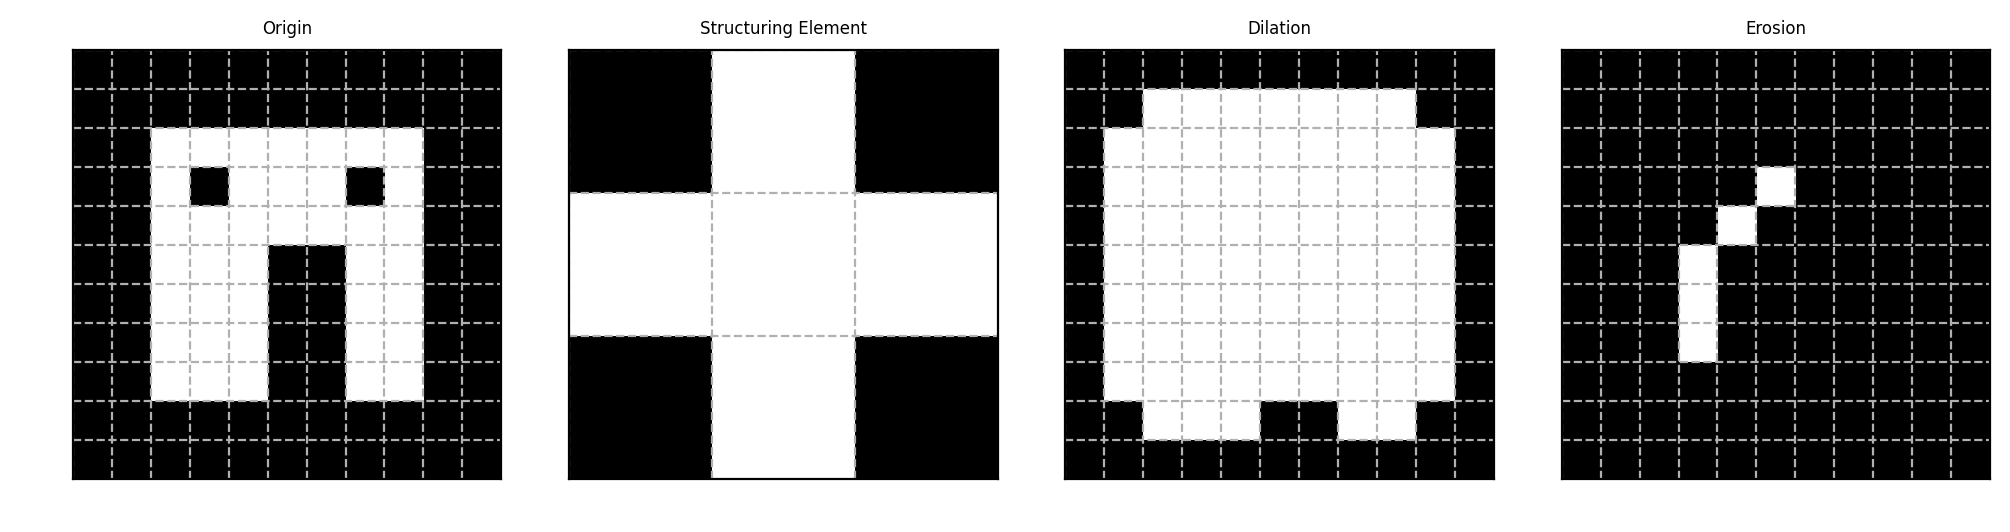

In [126]:
SE = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
])

matrix3_dilation = dilation(matrix3, SE)
matrix3_erosion = erosion(matrix3, SE)

plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
plt.imshow(matrix3, cmap='gray')
plt.title('Origin')
plt.xticks([i-0.5 for i in range(matrix3.shape[1])])
plt.yticks([i-0.5 for i in range(matrix3.shape[0])])
plt.grid(linestyle='--')
plt.tick_params(axis='x', labelcolor='white', width=0)
plt.tick_params(axis='y', labelcolor='white', width=0)

plt.subplot(1, 4, 2)
plt.imshow(SE, cmap='gray')
plt.title('Structuring Element')
plt.xticks([i-0.5 for i in range(SE.shape[1])])
plt.yticks([i-0.5 for i in range(SE.shape[0])])
plt.grid(linestyle='--')
plt.tick_params(axis='x', labelcolor='white', width=0)
plt.tick_params(axis='y', labelcolor='white', width=0)

plt.subplot(1, 4, 3)
plt.imshow(matrix3_dilation, cmap='gray')
plt.title('Dilation')
plt.xticks([i-0.5 for i in range(matrix3_dilation.shape[1])])
plt.yticks([i-0.5 for i in range(matrix3_dilation.shape[0])])
plt.grid(linestyle='--')
plt.tick_params(axis='x', labelcolor='white', width=0)
plt.tick_params(axis='y', labelcolor='white', width=0)

plt.subplot(1, 4, 4)
plt.imshow(matrix3_erosion, cmap='gray')
plt.title('Erosion')
plt.xticks([i-0.5 for i in range(matrix3_erosion.shape[1])])
plt.yticks([i-0.5 for i in range(matrix3_erosion.shape[0])])
plt.grid(linestyle='--')
plt.tick_params(axis='x', labelcolor='white', width=0)
plt.tick_params(axis='y', labelcolor='white', width=0)

plt.tight_layout()
plt.savefig('./img/07_de.png', dpi=150, bbox_inches='tight')

### Opening & Closing
$$ \text{Opening : } A\circ B = (A\ominus B)\oplus B $$
$$ \text{Closing : } A\ •\ B = (A\oplus B)\ominus B $$

In [127]:
def opening(img, se):
    answer = erosion(img, se)
    answer = dilation(answer, se)
    return answer

def closing(img, se):
    answer = dilation(img, se)
    answer = erosion(answer, se)
    return answer

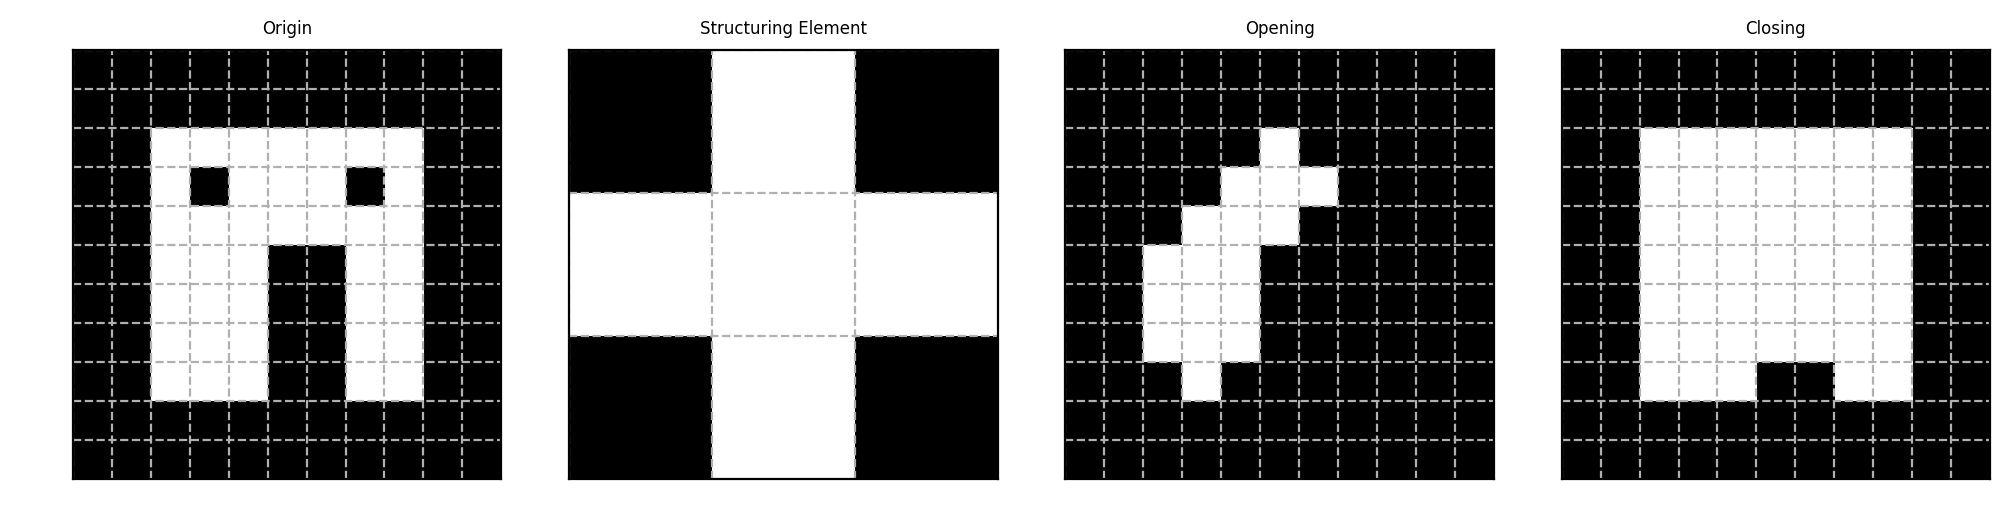

In [128]:
SE = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
])

matrix3_opening = opening(matrix3, SE)
matrix3_closing = closing(matrix3, SE)

plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
plt.imshow(matrix3, cmap='gray')
plt.title('Origin')
plt.xticks([i-0.5 for i in range(matrix3.shape[1])])
plt.yticks([i-0.5 for i in range(matrix3.shape[0])])
plt.grid(linestyle='--')
plt.tick_params(axis='x', labelcolor='white', width=0)
plt.tick_params(axis='y', labelcolor='white', width=0)

plt.subplot(1, 4, 2)
plt.imshow(SE, cmap='gray')
plt.title('Structuring Element')
plt.xticks([i-0.5 for i in range(SE.shape[1])])
plt.yticks([i-0.5 for i in range(SE.shape[0])])
plt.grid(linestyle='--')
plt.tick_params(axis='x', labelcolor='white', width=0)
plt.tick_params(axis='y', labelcolor='white', width=0)

plt.subplot(1, 4, 3)
plt.imshow(matrix3_opening, cmap='gray')
plt.title('Opening')
plt.xticks([i-0.5 for i in range(matrix3_opening.shape[1])])
plt.yticks([i-0.5 for i in range(matrix3_opening.shape[0])])
plt.grid(linestyle='--')
plt.tick_params(axis='x', labelcolor='white', width=0)
plt.tick_params(axis='y', labelcolor='white', width=0)

plt.subplot(1, 4, 4)
plt.imshow(matrix3_closing, cmap='gray')
plt.title('Closing')
plt.xticks([i-0.5 for i in range(matrix3_closing.shape[1])])
plt.yticks([i-0.5 for i in range(matrix3_closing.shape[0])])
plt.grid(linestyle='--')
plt.tick_params(axis='x', labelcolor='white', width=0)
plt.tick_params(axis='y', labelcolor='white', width=0)

plt.tight_layout()
plt.savefig('./img/07_oc.png', dpi=150, bbox_inches='tight')

### Hit-or-Miss Transformation

$$ A\odot B = (A\ominus B_1)\cap(A^c\ominus B_2) \\ \text{where }B=(B_1, B_2) $$

Text(0.5, 1.0, 'B2')

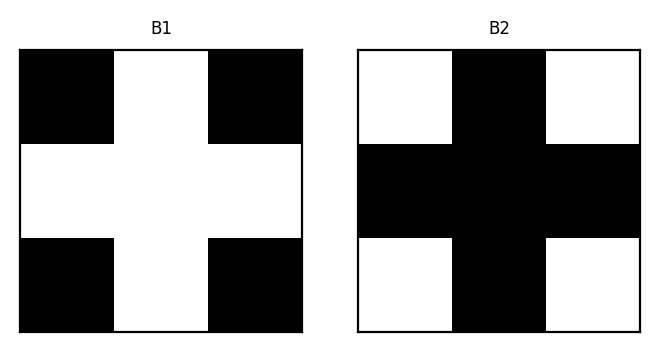

In [4]:
A = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
])

B1 = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
])

B2 = np.array([
    [1, 0, 1],
    [0, 0, 0],
    [1, 0, 1]
])
plt.subplot(1, 2, 1)
plt.imshow(B1, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('B1')

plt.subplot(1, 2, 2)
plt.imshow(B2, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('B2')

plt.savefig('./img/07_SE.png', dpi=150, bbox_inches='tight')

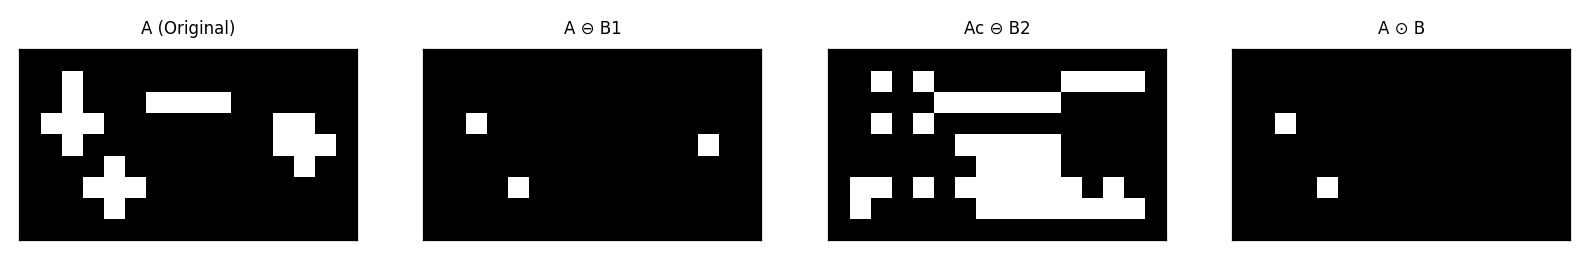

In [13]:
A_erosion_B1 = erosion(A, B1)
Ac_erosion_B2 = erosion(np.where(A>0, 0, 1), B2)
A_hom_B = np.where(A_erosion_B1&Ac_erosion_B2, 1, 0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(A, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title("A (Original)")

plt.subplot(1, 4, 2)
plt.imshow(A_erosion_B1, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('A ⊖ B1')

plt.subplot(1, 4, 3)
plt.imshow(Ac_erosion_B2, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Ac ⊖ B2')

plt.subplot(1, 4, 4)
plt.imshow(A_hom_B, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('A ⊙ B')

plt.savefig('./img/07_HoM.png', dpi=150, bbox_inches='tight')